<a href="https://colab.research.google.com/github/maycom306/DecisionTree_diabetes/blob/main/pre_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-processamento de dados
Trabalho de IA


In [ ]:
#como o colab não tem essa biblioteca é preciso
!pip install scipy

In [ ]:
#bibliotecas utilizadas
import pandas as pd #para manipular o dataset
import sqlite3 as sql#fazer conexão com o banco de dados
from scipy.io import arff #Conseguir ler o arquivo arff
from sklearn.utils import resample # fazer o balanceamento
import seaborn as sns #visualizar os dados (tabelas)
import matplotlib.pyplot as plt #visualizar os dados (gráficos)

In [ ]:
#utilizar o scipy para ler o dataset e ter uma visualização
data, meta = arff.loadarff('/content/diabetes.arff') #dividir o dataset em duas partes Data contendo os valores e meta os tipos
df = pd.DataFrame(data)
#df head é um comando que mostra as 5 primerias linhas
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,b'tested_negative'
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,b'tested_negative'
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,b'tested_negative'
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,b'tested_positive'




---


# DETALHAMENTO DOS DADOS



1. **preg**: Número de vezes que a pessoa esteve grávida.
   
2. **plas**: Concentração de glicose plasmática 2 horas após um teste de tolerância à glicose oral.
  
3. **pres**: Pressão arterial diastólica (mm Hg).
   
4. **skin**: Espessura da dobra cutânea do tríceps (mm).
   
5. **insu**: Insulina sérica em jejum de 2 horas (mu U/ml).
   
6. **mass**: Índice de massa corporal (peso em kg / (altura em m)^2).
   
7. **pedi**: Função de pedigree de diabetes (uma medida da predisposição genética para diabetes através da árvore genealógica).
   
8. **age**: Idade da pessoa em anos.
   
9. **class**: Classe de saída que indica se a pessoa foi testada negativa ou positiva para diabetes ('tested_negative' ou 'tested_positive').




---


# 1° etapa do Pré-processamento
Eliminação manual de atributos


---



In [ ]:
 df = df.drop(columns=['skin']) #eliminação da coluna skin

In [ ]:
# Exibir as primeiras linhas do DataFrame após eliminar a coluna
df

,preg,plas,pres,insu,mass,pedi,age,class
0,6.0,148.0,72.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,168.0,43.1,2.288,33.0,b'tested_positive'
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,180.0,32.9,0.171,63.0,b'tested_negative'
764,2.0,122.0,70.0,0.0,36.8,0.340,27.0,b'tested_negative'
765,5.0,121.0,72.0,112.0,26.2,0.245,30.0,b'tested_negative'
766,1.0,126.0,60.0,0.0,30.1,0.349,47.0,b'tested_positive'





---


#2° Etapa do pré-processamento

integração de dados
  
    
1.  Verificar valores duplicado

  

In [ ]:
#verficar tipos de dados por coluna
df.dtypes

,0
preg,float64
plas,float64
pres,float64
insu,float64
mass,float64
pedi,float64
age,float64
class,object


In [ ]:
duplicado = df.duplicated() #vai dar valores boleanos se uma coluna é duplicada ou não
if duplicado.any(): #verifica se há ao menos uma true
    print("Existem valores duplicados")
else:
    print("Não existem valores duplicados")

#nao tem valores duplicados

Não existem valores duplicados




---


#Etapa 3, 4, 5 e 7 do pré-processamento

1. Amostragem dos dados
2. Redução de dimensionalidade
3. balanceamento
4. transformação


---



# Verificar a amostragem


---



In [ ]:
print(df['class'].unique())  #verificar se tem mais de algum objeto ao inves de b'tested_positive' b'tested_negative
conta = df['class'].value_counts()#contar quantos valores tem de cada objeto
print(conta)

[b'tested_positive' b'tested_negative']
class
b'tested_negative'    500
b'tested_positive'    268
Name: count, dtype: int64


#converter a class de nome para numeros


---



In [ ]:
# Converter a coluna 'class' para 0 e 1
df['class'] = df['class'].replace({b'tested_negative': 0, b'tested_positive': 1})

# Verificar a nova distribuição de classes após a conversão
print("Nova distribuição de classes após conversão:")
print(df['class'].unique())
df


Nova distribuição de classes após conversão:
[1 0]


,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1




---
  

# balancear o dataset para ter a mesma quantidade de positivos e negativos.
    
  
---



In [ ]:
df_negativo = df[df['class'] == 0]
df_positivo = df[df['class'] == 1]

df_negativo_balanceado = resample(df_negativo, replace=True, n_samples=len(df_positivo), random_state=42)

# Combinar as amostras balanceadas das duas classes em um único DataFrame
df_balanceado = pd.concat([df_negativo_balanceado, df_positivo])

# Verificar a nova distribuição de classes
print("Nova distribuição de classes após balanceamento:")
print(df_balanceado['class'].value_counts())
df_balanceado

Nova distribuição de classes após balanceamento:
class
0    268
1    268
Name: count, dtype: int64


,preg,plas,pres,insu,mass,pedi,age,class
158,2.0,88.0,74.0,53.0,29.0,0.229,22.0,0
660,10.0,162.0,84.0,0.0,27.7,0.182,54.0,0
537,0.0,57.0,60.0,0.0,21.7,0.735,67.0,0
437,5.0,147.0,75.0,0.0,29.9,0.434,28.0,0
163,2.0,100.0,64.0,0.0,29.7,0.368,21.0,0
...,...,...,...,...,...,...,...,...
755,1.0,128.0,88.0,110.0,36.5,1.057,37.0,1
757,0.0,123.0,72.0,0.0,36.3,0.258,52.0,1
759,6.0,190.0,92.0,0.0,35.5,0.278,66.0,1
761,9.0,170.0,74.0,0.0,44.0,0.403,43.0,1


# 6° do Pré-processamento



1.   Limpeza




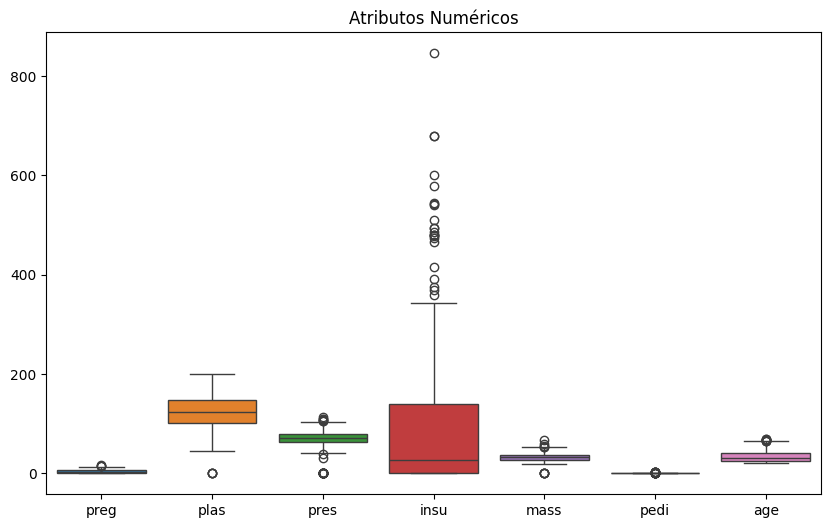

In [ ]:

# criar a tabela para todas as colunas numéricas
plt.figure(figsize=(10, 6))  # Configurar o tamanho da figura
sns.boxplot(data=df_balanceado.drop(columns=['class']))  # Excluir a coluna 'class' dos boxplots
plt.title('Atributos Numéricos') #titulo
plt.show()  # Exibir o gráfico
#por mais que tenha valores discrepantes nao é considerado ruido, pois diabeticos tende a ter valores parecidos
#como foi visto anteriormente nao tem redundancia e nem nenhum valor precisa ser limpo.



---


# Transformação do dataset de ARFF para SQL


---



In [ ]:
# Conectar ao banco de dados SQLite
conn = sql.connect('/content/diabetes.db') #cria uma conexão com o banco de dados que vai ser chamado de diabetes.db e especificar o local

# Salvar o DataFrame balanceado como tabela no banco de dados SQLite
df_balanceado.to_sql('diabetes', conn, if_exists='replace', index=False) #utilizar o to_sql para escrever os dados do dataframe numa tabela

conn.close()# Fechar a conexão com o banco de dados

print("Dataset balanceado foi salvo como tabela 'diabetes' no banco de dados 'diabetes.db'.")


Dataset balanceado foi salvo como tabela 'diabetes' no banco de dados 'diabetes.db'.


# Demonstração

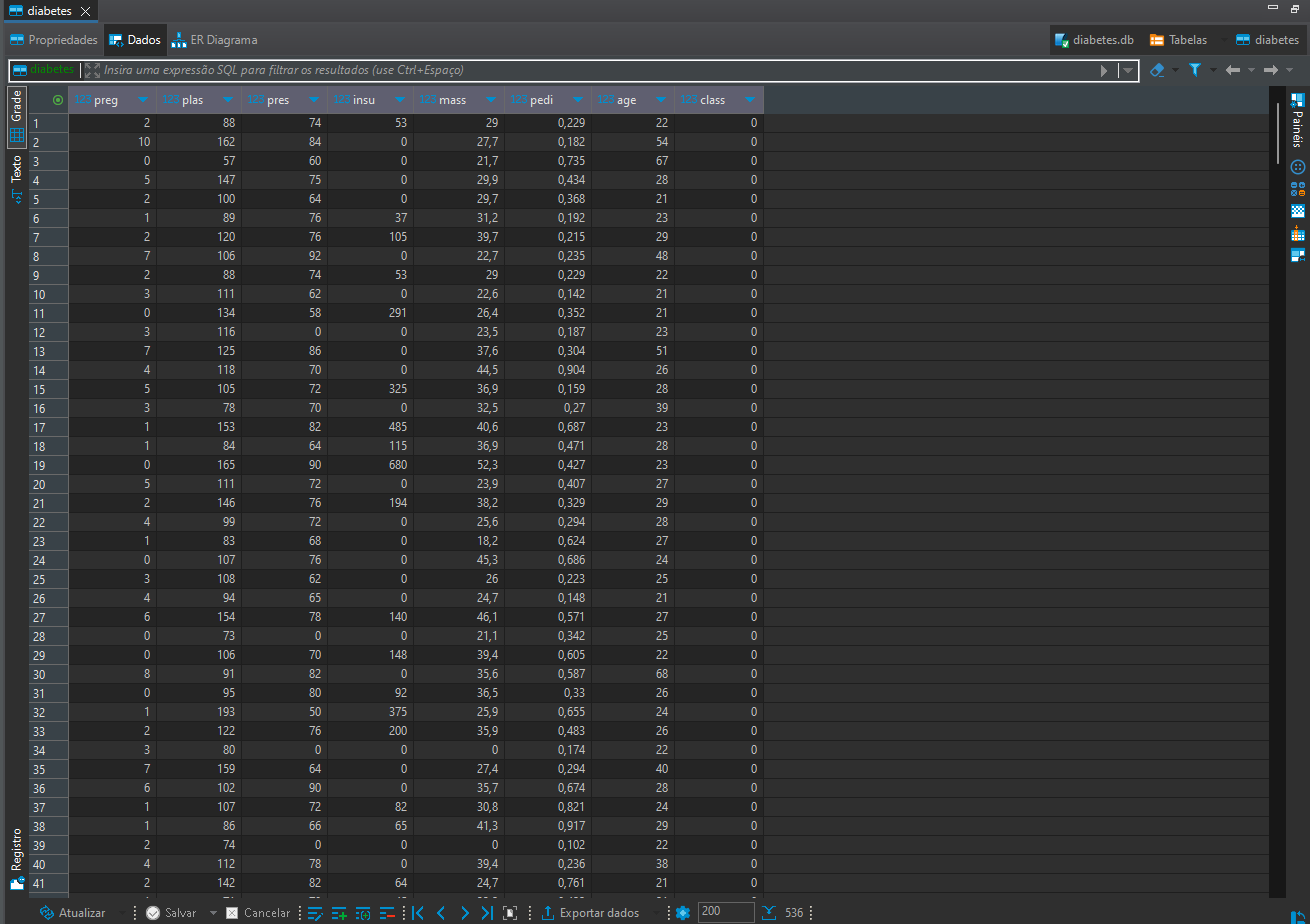

Foto do banco de dados com todas as informações